In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
data = pd.read_csv("C:/Users/Jagjyot Singh/JUPITER Files and CSVs/stock.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


# Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [8]:
df.shape

(1235, 8)

In [9]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


In [13]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [15]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.997704
High,0.999159
Low,0.999065
Last,0.999963
Close,1.000000


In [16]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Last,Close
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


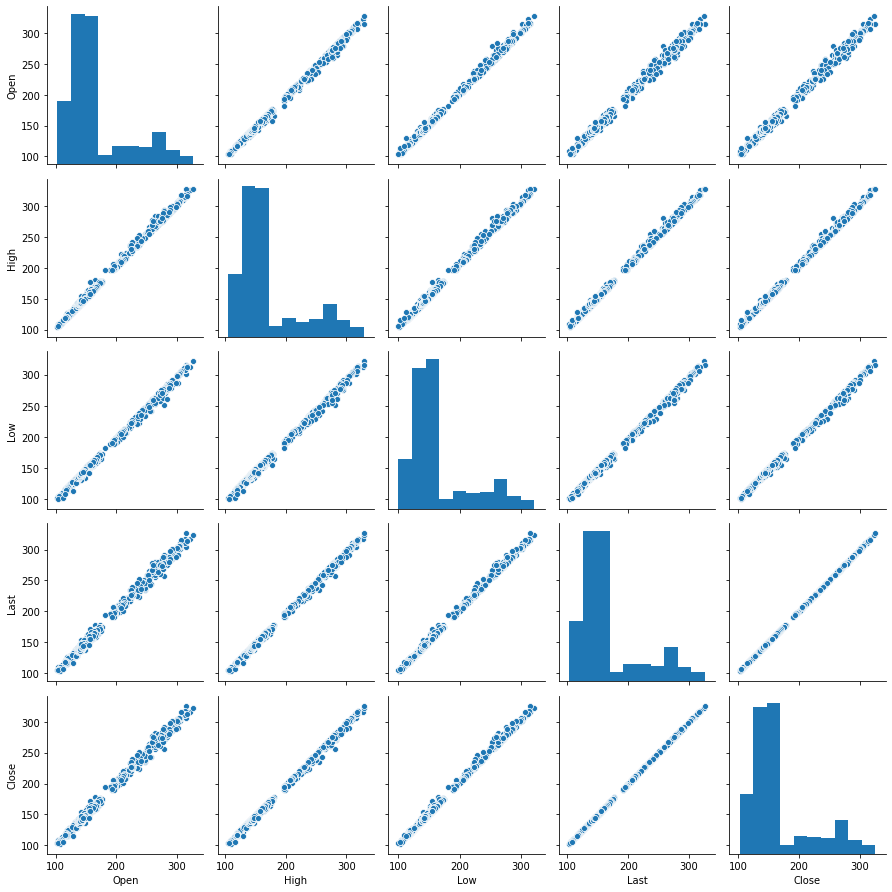

In [17]:
sns.pairplot(df)
plt.tight_layout()

In [20]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Last
0,0.467290,0.524872,0.482066,0.507723
1,0.507343,0.508588,0.477780,0.481979
2,0.536271,0.549632,0.524024,0.513320
3,0.565198,0.592907,0.567336,0.554511
4,0.585447,0.579969,0.546131,0.571748


# Prediction Model

In [32]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

#Acc = []

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
988,160.25,160.098960
989,158.80,159.455953
990,158.85,158.876692
991,159.35,159.516729
992,159.00,159.123727


# Accuracy Score

In [35]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score: {0:.2%}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score: 99.84%


# Visualization

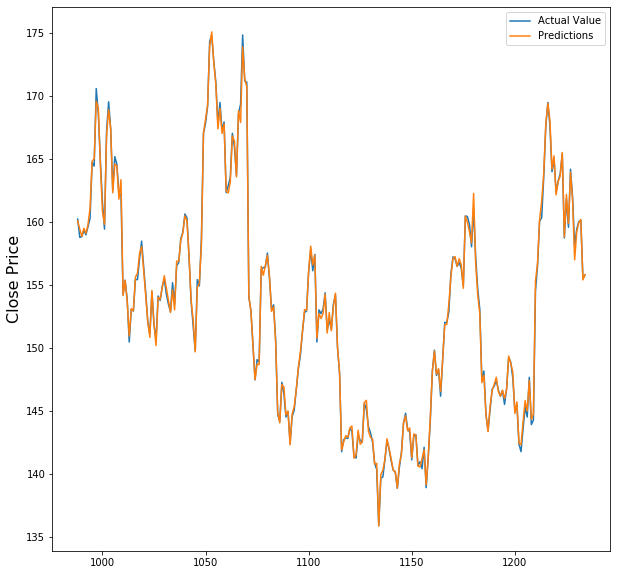

In [36]:
plt.figure(figsize=(10,10))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()